In [72]:
import experiment as exp
from qiskit import Aer

import numpy as np
import matplotlib.pyplot as plt
import plot_utils

In [2]:
method = ('COBYLA', {'rhobeg': 1.2,
                     'maxiter': 1000,
                     'disp': False,
                     'catol': 0.0002})

density = 0.4

backend_creator = lambda: Aer.get_backend('qasm_simulator')

In [3]:
exp_dim = 9

In [4]:
experiment = exp.Experiment(p = 1, 
                            dim=exp_dim,
                            method=method,
                            create_backend=backend_creator)

model = experiment.generate_model(dens=density)

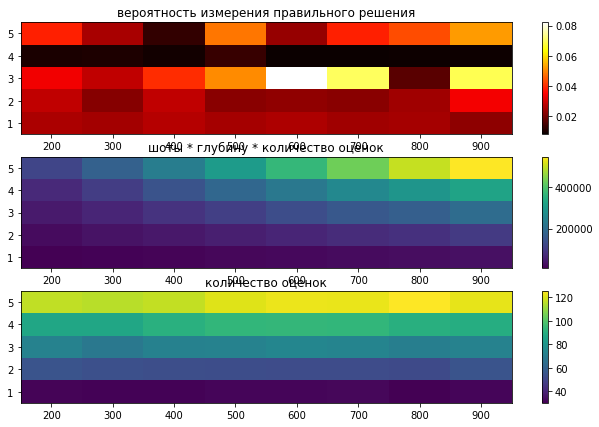

In [65]:
def get_computable_function(experiment, model):
    def func(shots, p):
        experiment.p = p
        experiment.shots = shots
        brute_results = experiment.brute_force(model)
        minval = min(brute_results.values())
        res = [k for k, v in brute_results.items() if v == minval]
        acc = 0
        acc2 = 0
        for i in range(10):
            solution = experiment.solve(model)
            theta = solution.x
            counts, (item, _) = experiment.retrieve_state_distribution(model, theta)
            acc += sum([counts.get(r, 0) for r in res]) / sum(counts.values())
            acc2 += solution.nfev
        return acc / 10,  acc2 / 10 * p * shots, acc2 / 10
    return func

func = get_computable_function(experiment, model)

def compute(func, shots_start, shots_total, shots_step, depth_total):
    shots = range(shots_start, shots_total, shots_step)
    depth = range(1, depth_total)

    shots, depth = np.meshgrid(shots, depth)

    F = np.array([
        [func(s_e, p_e) for (s_e, p_e) in zip(s, p)]
         for s, p in zip(shots, depth)
    ])
    return shots, depth, F

s, p, f = compute(func, 200, 999, 100, 6)
fig, axs = plt.subplots(3, 1)
c = axs[0].pcolormesh(s, p, [[fff[0] for fff in ff] for ff in f], cmap='hot')
fig.colorbar(c, ax=axs[0])
axs[0].set_title('вероятность измерения правильного решения')

c = axs[1].pcolormesh(s, p, [[fff[1] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[1])
axs[1].set_title('шоты * глубину * количество оценок')

c = axs[2].pcolormesh(s, p, [[fff[2] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[2])
axs[2].set_title('количество оценок')

fig.set_size_inches(11, 20, forward=True)
plt.show()

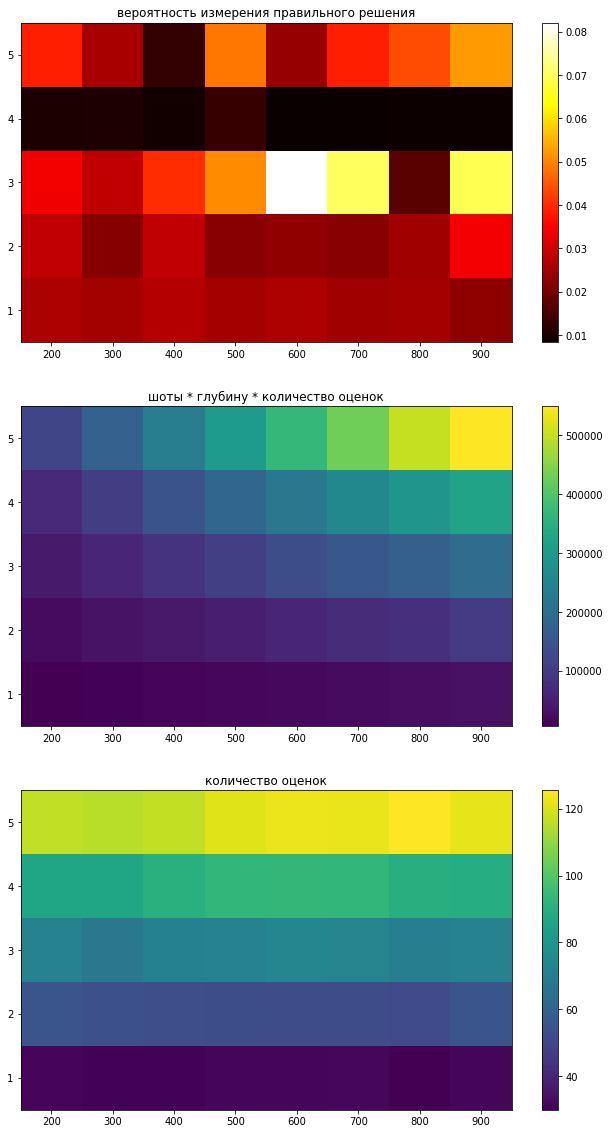

In [67]:

fig, axs = plt.subplots(3, 1)
c = axs[0].pcolormesh(s, p, [[fff[0] for fff in ff] for ff in f], cmap='hot')
fig.colorbar(c, ax=axs[0])
axs[0].set_title('вероятность измерения правильного решения')

c = axs[1].pcolormesh(s, p, [[fff[1] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[1])
axs[1].set_title('шоты * глубину * количество оценок')

c = axs[2].pcolormesh(s, p, [[fff[2] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[2])
axs[2].set_title('количество оценок')
fig.set_size_inches(11, 20, forward=True)
plt.show()

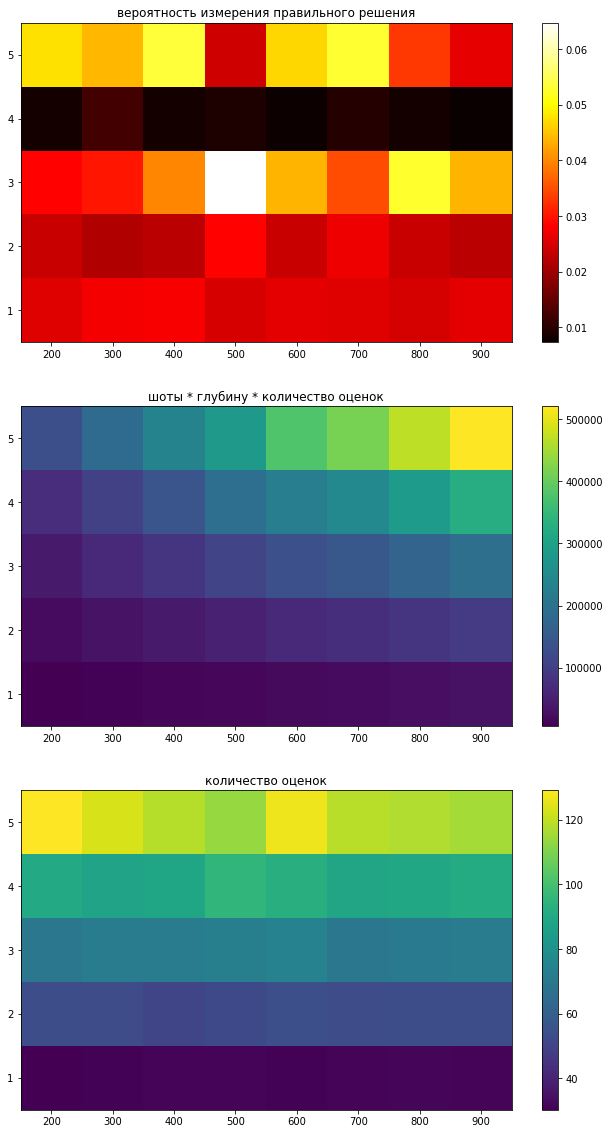

In [70]:
# model = experiment.generate_model(dens=density)
# func = get_computable_function(experiment, model)
# s, p, f = compute(func, 200, 999, 100, 6)
fig, axs = plt.subplots(3, 1)
c = axs[0].pcolormesh(s, p, [[fff[0] for fff in ff] for ff in f], cmap='hot')
fig.colorbar(c, ax=axs[0])
axs[0].set_title('вероятность измерения правильного решения')

c = axs[1].pcolormesh(s, p, [[fff[1] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[1])
axs[1].set_title('шоты * глубину * количество оценок')

c = axs[2].pcolormesh(s, p, [[fff[2] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[2])
axs[2].set_title('количество оценок')
fig.set_size_inches(11, 20, forward=True)
plt.show()

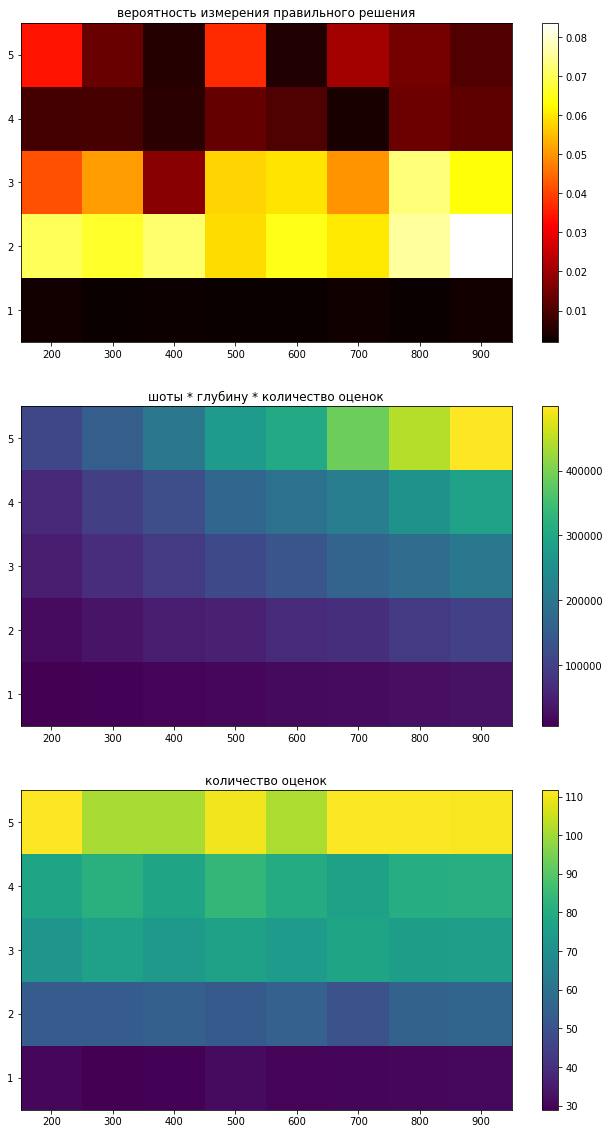

In [71]:
model = experiment.generate_model(dens=density)
func = get_computable_function(experiment, model)
s, p, f = compute(func, 200, 999, 100, 6)
fig, axs = plt.subplots(3, 1)
c = axs[0].pcolormesh(s, p, [[fff[0] for fff in ff] for ff in f], cmap='hot')
fig.colorbar(c, ax=axs[0])
axs[0].set_title('вероятность измерения правильного решения')

c = axs[1].pcolormesh(s, p, [[fff[1] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[1])
axs[1].set_title('шоты * глубину * количество оценок')

c = axs[2].pcolormesh(s, p, [[fff[2] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[2])
axs[2].set_title('количество оценок')
fig.set_size_inches(11, 20, forward=True)
plt.show()

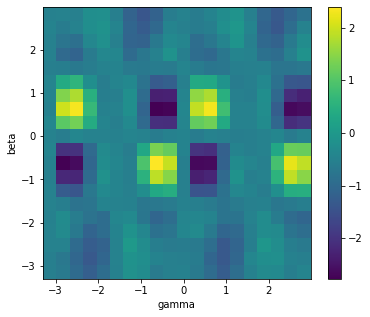

In [74]:
experiment.p = 1
exp_function = experiment.get_expectation_function(model)
landscape = plot_utils.compute_energy_landscape(exp_function, grid=(20, 20))
plot_utils.plot_energy_landscape(landscape)

Придумать, как расследовать из-за чего рандом в вероятности измерения правильного решения

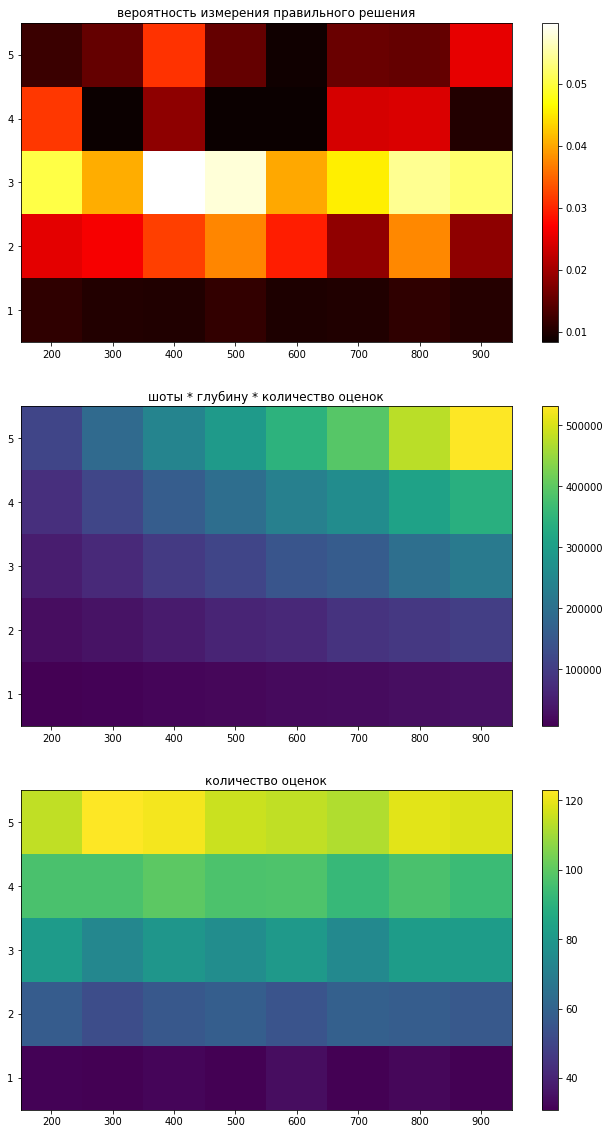

In [75]:
experiment2 = exp.Experiment(p = 1, 
                            dim=15,
                            method=method,
                            create_backend=backend_creator)

model2 = experiment2.generate_model(dens=density)
func = get_computable_function(experiment2, model2)
s, p, f = compute(func, 200, 999, 100, 6)
fig, axs = plt.subplots(3, 1)
c = axs[0].pcolormesh(s, p, [[fff[0] for fff in ff] for ff in f], cmap='hot')
fig.colorbar(c, ax=axs[0])
axs[0].set_title('вероятность измерения правильного решения')

c = axs[1].pcolormesh(s, p, [[fff[1] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[1])
axs[1].set_title('шоты * глубину * количество оценок')

c = axs[2].pcolormesh(s, p, [[fff[2] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[2])
axs[2].set_title('количество оценок')
fig.set_size_inches(11, 20, forward=True)
plt.show()

In [76]:
experiment22 = exp.Experiment(p = 1, 
                            dim=15,
                            method=method,
                            create_backend=backend_creator)

model22 = experiment22.generate_model(dens=density)
func = get_computable_function(experiment22, model22)
s, p, f = compute(func, 200, 999, 100, 6)
fig, axs = plt.subplots(3, 1)
c = axs[0].pcolormesh(s, p, [[fff[0] for fff in ff] for ff in f], cmap='hot')
fig.colorbar(c, ax=axs[0])
axs[0].set_title('вероятность измерения правильного решения')

c = axs[1].pcolormesh(s, p, [[fff[1] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[1])
axs[1].set_title('шоты * глубину * количество оценок')

c = axs[2].pcolormesh(s, p, [[fff[2] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[2])
axs[2].set_title('количество оценок')
fig.set_size_inches(11, 20, forward=True)
plt.show()